In [1]:
%reload_ext autoreload
%autoreload 2

import sys
sys.path.append("../../")
sys.path.append("../")
import os
import numpy as np
from hwr_utils import *
from hwr_utils.stroke_plotting import *
from hwr_utils.stroke_recovery import *
from hwr_utils.stroke_dataset import *
import json

In [2]:
path = "/media/data/GitHub/simple_hwr/RESULTS/TEST_20200220_163954-baseline/imgs/1/train/example_data.pickle"
path = r"/home/taylor/shares/brodie/github/simple_hwr/RESULTS/ver2/20200220_164052-normal/imgs/21/train/example_data.pickle"
d = utils.unpickle_it(path)

preds = [x.detach().numpy() for x in d["preds"]]
item = d["item"]
gt = d["item"]["gt_list"][0].numpy()
pred = preds[0].transpose(1,0)

draw_from_gt(gt, show=True, use_stroke_number=True, plot_points=True)
draw_from_gt(pred, show=True, use_stroke_number=False, plot_points=True)
pass

In [3]:
json_path = "../../data/online_coordinate_data/8_stroke_vSmall_16/train_online_coords.json"
json_path = "/media/data/GitHub/simple_hwr/data/online_coordinate_data/MAX_stroke_vlargeTrnSetFull/train_online_coords.json"
json_path = "/media/data/GitHub/simple_hwr/data/online_coordinate_data/MAX_stroke_vlargeTrnSetFull/test_online_coords.json"

parameter = "d"
with open(json_path) as f:
    output_dict = json.load(f)


In [74]:
# b04-236z-03_0
# a10-697z-02
# overlay_1_a01-001z-04_1
print(output_dict[0].keys())
for item2 in output_dict:
    if "a01-001z-04" not in item2["full_img_path"]:
        continue
    else:
        item=item2

dict_keys(['full_img_path', 'xml_path', 'image_path', 'dataset', 'x', 'y', 't', 'd', 'start_times', 'x_to_y', 'start_strokes', 'raw', 'tmin', 'tmax', 'trange', 'drange', 'shape'])


In [83]:
output = prep_stroke_dict(item["raw"], time_interval=0, scale_time_distance=True) # list of dictionaries, 1 per file
if False:
    x = output["x"]
    y = output["y"]
    is_start_stroke = output["start_strokes"]
    gt = np.array([x,y,is_start_stroke]).transpose([1,0])
    img = draw_from_gt(gt, show=True, use_stroke_number=False, plot_points=True, linewidth=1)

parameter = "d"

# Resample
def test():
    for i in range(10):
        x_func, y_func = stroke_recovery.create_functions_from_strokes(output, parameter=parameter) # can be d if the function should be a function of distance
        starts = output.start_times if parameter=="t" else output.start_distances
        x, y, is_start_stroke = stroke_recovery.sample(x_func, y_func, starts, 1200, noise=True)
        gt = np.array([x,y,is_start_stroke]).transpose([1,0])
        img = draw_from_gt(gt, show=True, use_stroke_number=False, plot_points=False, linewidth=2)
        print(item["full_img_path"])
        #starts = gt[:,2]

def test2():
    gt_format = ["x", "y", "stroke_number", "eos"]
    x_func, y_func = stroke_recovery.create_functions_from_strokes(output, parameter=parameter) # can be d if the function should be a function of distance
    start_times = output.start_times if parameter=="t" else output.start_distances
    number_of_samples = img_width_to_pred_mapping(item["shape"][1])
    for _test in True, False:
        if _test:
            gt = create_gts(x_func, y_func, start_times, number_of_samples, gt_format, noise=True)
        else:
            x, y, is_start_stroke = stroke_recovery.sample(x_func, y_func, start_times, number_of_samples, noise=True)
            gt = np.array([x,y,is_start_stroke]).transpose([1,0])
        img = draw_from_gt(gt, show=True, use_stroke_number=_test, plot_points=False, linewidth=2)

for i in range(1):
    test2()

In [84]:
np.float64

numpy.float64

In [18]:
x = {'full_img_path': 'prepare_online_data/lineImages/a01/a01-001/a01-001z-08.tif', 'xml_path': 'prepare_online_data/line-level-xml/lineStrokes/a01/a01-001/a01-001z-08.xml', 'image_path': 'online_coordinate_data/8_stroke_vSmall_16/images/a01-001z-08_0.tif', 'dataset': 'test', 'x': [0.14124293785310735, 0.14124293785310735, 0.14689265536723164, 0.14689265536723164, 0.14689265536723164, 0.1374764595103578, 0.12429378531073447, 0.10734463276836158, 0.08286252354048965, 0.05649717514124294, 0.03389830508474576, 0.015065913370998116, 0.0, 0.20527306967984935, 0.20903954802259886, 0.20527306967984935, 0.192090395480226, 0.1657250470809793, 0.1393596986817326, 0.10922787193973635, 0.08286252354048965, 0.30131826741996237, 0.2937853107344633, 0.29190207156308856, 0.29190207156308856, 0.2975517890772128, 0.2956685499058381, 0.35028248587570626, 0.3634651600753296, 0.37664783427495296, 0.3804143126177025, 0.3879472693032015, 0.391713747645951, 0.3879472693032015, 0.3860640301318268, 0.6214689265536723, 0.6271186440677966, 0.6177024482109228, 0.6101694915254238, 0.5988700564971752, 0.5913370998116761, 0.5819209039548022, 0.5875706214689266, 0.5932203389830509, 0.6120527306967986, 0.6365348399246704, 0.6666666666666666, 0.6986817325800377, 0.7231638418079096, 0.7419962335216572, 0.7532956685499059, 0.7551789077212807, 0.8738229755178908, 0.8832391713747646, 0.8926553672316384, 0.9058380414312618, 0.9227871939736347, 0.9322033898305085, 0.9491525423728814, 0.928436911487759, 0.9265536723163842, 0.9246704331450095, 0.9322033898305085, 0.943502824858757, 0.9661016949152542, 0.9887005649717514, 1.11864406779661, 1.097928436911488, 1.0828625235404896, 1.0696798493408664, 1.064030131826742, 1.0677966101694916, 1.073446327683616, 1.0903954802259888, 0.8681732580037665, 0.8531073446327684, 0.8568738229755178, 0.8775894538606404, 0.896421845574388, 1.3578154425612052, 1.3540489642184557, 1.35969868173258, 1.35969868173258, 1.3559322033898304, 1.3465160075329567, 1.3370998116760828, 1.3239171374764596, 1.3182674199623352, 1.3258003766478343, 1.3408662900188324, 1.3634651600753296, 1.3917137476459511, 1.5329566854990584, 1.5310734463276836, 1.5291902071563088, 1.536723163841808, 1.5423728813559323, 1.551789077212806, 1.5630885122410547, 1.5725047080979284, 1.4444444444444444, 1.4463276836158192, 1.4519774011299436, 1.4764595103578153, 1.5084745762711866, 1.5461393596986817, 1.5932203389830508, 1.694915254237288, 1.6930320150659133, 2.7853107344632773, 2.7853107344632773, 2.787193973634652, 2.7890772128060264, 2.7890772128060264, 2.7890772128060264, 2.787193973634652, 2.7815442561205277, 2.768361581920904, 2.7532956685499057, 2.7306967984934087, 2.7080979284369113, 2.681732580037665, 2.6553672316384183, 2.787193973634652, 2.7853107344632773, 2.7834274952919023, 2.7909604519774014, 2.8041431261770247, 2.819209039548023, 2.847457627118644, 3.0150659133709983, 3.0131826741996237, 3.018832391713748, 3.024482109227872, 3.033898305084746, 3.0451977401129944, 3.0583804143126176, 3.0696798493408664, 3.28060263653484, 3.2843691148775895, 3.2956685499058382, 3.312617702448211, 3.3389830508474576, 3.512241054613936, 3.4990583804143127, 3.4990583804143127, 3.4934086629001886, 3.483992467043315, 3.470809792843691, 3.4632768361581925, 3.504708097928437, 3.506591337099812, 3.5084745762711864, 3.5103578154425614, 3.514124293785311, 3.5084745762711864, 3.5084745762711864, 3.657250470809793, 3.6798493408662902, 3.691148775894539, 3.6949152542372885, 3.6949152542372885, 3.6949152542372885, 3.691148775894539, 3.6760828625235407, 4.685499058380414, 4.685499058380414, 4.6930320150659135, 4.709981167608286, 4.736346516007534, 4.768361581920904, 4.7984934086629005, 4.826741996233522, 4.853107344632768, 4.838041431261771, 4.824858757062147, 4.813559322033899, 4.804143126177025, 4.8060263653484, 4.800376647834275, 4.8229755178907725, 4.836158192090395, 4.845574387947269, 4.862523540489642, 4.875706214689266, 4.894538606403013, 4.911487758945386, 4.922787193973635, 5.167608286252355, 5.1807909604519775, 5.178907721280603, 5.177024482109228, 5.171374764595104, 5.1600753295668556, 5.148775894538606, 5.278719397363465, 5.318267419962336, 5.344632768361582, 5.357815442561205, 5.372881355932203, 5.372881355932203, 5.372881355932203, 5.370998116760829, 6.112994350282486, 6.112994350282486, 6.112994350282486, 6.112994350282486, 6.112994350282486, 6.112994350282486, 6.112994350282486, 6.114877589453861, 6.12241054613936, 6.129943502824859, 6.139359698681733, 6.4124293785310735, 6.43502824858757, 6.448210922787195, 6.467043314500942, 6.483992467043315, 6.491525423728814, 6.499058380414313, 6.43502824858757, 6.427495291902071], 'y': [0.5706214689265536, 0.5649717514124294, 0.5706214689265536, 0.5725047080979284, 0.5781544256120527, 0.5781544256120527, 0.5951035781544256, 0.60075329566855, 0.6101694915254238, 0.6101694915254238, 0.6026365348399247, 0.5875706214689266, 0.5800376647834274, 0.30131826741996237, 0.2768361581920904, 0.26930320150659137, 0.26177024482109224, 0.256120527306968, 0.24670433145009418, 0.24670433145009418, 0.24670433145009418, 0.5781544256120527, 0.5856873822975518, 0.5781544256120527, 0.5706214689265536, 0.5423728813559322, 0.5103578154425612, 0.3973634651600753, 0.42749529190207153, 0.4726930320150659, 0.512241054613936, 0.5329566854990584, 0.5423728813559322, 0.5499058380414312, 0.5423728813559322, 0.6817325800376648, 0.967984934086629, 0.9962335216572505, 0.8229755178907722, 0.7627118644067797, 0.6817325800376648, 0.6045197740112994, 0.5216572504708098, 0.46139359698681737, 0.416195856873823, 0.3804143126177025, 0.3672316384180791, 0.35028248587570626, 0.352165725047081, 0.3691148775894538, 0.384180790960452, 0.4143126177024482, 0.4256120527306968, 0.3822975517890772, 0.3220338983050848, 0.24670433145009418, 0.15630885122410546, 0.06591337099811675, 0.0, 0.11299435028248588, 0.1864406779661017, 0.263653483992467, 0.32391713747645956, 0.3691148775894538, 0.40866290018832396, 0.4312617702448211, 0.5084745762711864, 0.5141242937853107, 0.504708097928437, 0.48775894538606407, 0.4726930320150659, 0.4500941619585687, 0.42749529190207153, 0.3992467043314501, 0.7871939736346516, 0.7966101694915254, 0.7947269303201506, 0.7740112994350282, 0.7589453860640302, 0.48587570621468923, 0.5009416195856874, 0.5160075329566854, 0.5009416195856874, 0.5009416195856874, 0.48587570621468923, 0.46139359698681737, 0.423728813559322, 0.4011299435028248, 0.3634651600753296, 0.3333333333333333, 0.3126177024482109, 0.3069679849340866, 0.9397363465160076, 0.9322033898305085, 0.9096045197740112, 0.8568738229755178, 0.7966101694915254, 0.7231638418079096, 0.64030131826742, 0.5725047080979284, 0.4632768361581921, 0.4632768361581921, 0.4632768361581921, 0.4576271186440678, 0.46139359698681737, 0.4726930320150659, 0.4839924670433145, 0.49340866290018837, 0.5009416195856874, 0.4952919020715631, 0.4952919020715631, 0.4952919020715631, 0.4971751412429379, 0.4971751412429379, 0.504708097928437, 0.512241054613936, 0.527306967984934, 0.5386064030131827, 0.544256120527307, 0.5480225988700566, 0.536723163841808, 0.5235404896421845, 0.4896421845574388, 0.4896421845574388, 0.48775894538606407, 0.4896421845574388, 0.4595103578154426, 0.4369114877589454, 0.4105461393596987, 0.3785310734463277, 0.48775894538606407, 0.48587570621468923, 0.4651600753295669, 0.4425612052730697, 0.4048964218455744, 0.3691148775894538, 0.3333333333333333, 0.32015065913371, 0.39548022598870053, 0.3634651600753296, 0.35028248587570626, 0.3389830508474576, 0.3446327683615819, 0.5461393596986818, 0.559322033898305, 0.559322033898305, 0.5423728813559322, 0.5235404896421845, 0.4971751412429379, 0.4651600753295669, 0.5461393596986818, 0.615819209039548, 0.6779661016949152, 0.7325800376647834, 0.7796610169491526, 0.8173258003766479, 0.832391713747646, 0.3483992467043315, 0.32391713747645956, 0.3107344632768361, 0.3126177024482109, 0.3182674199623352, 0.3182674199623352, 0.3258003766478343, 0.3389830508474576, 0.3596986817325801, 0.3596986817325801, 0.3615819209039548, 0.37664783427495296, 0.4067796610169492, 0.4576271186440678, 0.5141242937853107, 0.5725047080979284, 0.896421845574388, 0.9491525423728814, 0.9830508474576272, 0.9962335216572505, 1.0, 0.9943502824858758, 0.9755178907721281, 0.4124293785310735, 0.423728813559322, 0.4670433145009416, 0.512241054613936, 0.5630885122410546, 0.60075329566855, 0.6384180790960453, 0.6497175141242938, 0.527306967984934, 0.5649717514124294, 0.6026365348399247, 0.6271186440677966, 0.6421845574387948, 0.6534839924670434, 0.6497175141242938, 0.423728813559322, 0.4312617702448211, 0.448210922787194, 0.4519774011299435, 0.4500941619585687, 0.4576271186440678, 0.4576271186440678, 0.455743879472693, 0.5932203389830509, 0.5932203389830509, 0.5932203389830509, 0.5951035781544256, 0.5951035781544256, 0.5781544256120527, 0.5536723163841808, 0.5216572504708098, 0.4821092278719397, 0.4463276836158192, 0.4256120527306968, 0.6177024482109228, 0.6195856873822976, 0.615819209039548, 0.60075329566855, 0.5725047080979284, 0.544256120527307, 0.5065913370998117, 0.3728813559322034, 0.384180790960452], 't': [0.0, 0.01283312252054349, 0.038499367561630464, 0.08983185764380444, 0.14116434772597838, 0.19249683780815233, 0.2438293278903263, 0.28232869545195677, 0.33366118553413077, 0.38499367561630465, 0.43632616569847865, 0.4748255332601091, 0.526158023342283, 0.577490513424457, 0.628823003506631, 0.6673223710682615, 0.7186548611504355, 0.7699873512326093, 0.8213198413147833, 0.8726523313969573, 0.9111516989585877, 0.9111517374579553, 0.9624842275401293, 1.0138167176223032, 1.0651492077044773, 1.1036485752661076, 1.1549810653482815, 1.2063135554304556, 1.2576460455126295, 1.29614541307426, 1.3474779031564341, 1.3988103932386078, 1.450142883320782, 1.5014753734029558, 1.5399747409645863, 1.5913072310467604, 1.6426397211289343, 1.6939722112111084, 1.770970946334369, 1.7838040688549126, 1.8094703138959995, 1.8864690490192606, 1.9378015391014345, 1.976300906663065, 2.027633396745239, 2.0789658868274126, 2.130298376909587, 2.168797744471217, 2.220130234553391, 2.2714627246355654, 2.3227952147177393, 2.3869608273204563, 2.4382933174026307, 2.476792684964261, 2.528125175046435, 2.5794576651286083, 2.6307901552107826, 2.6821226452929565, 2.7206220128545873, 2.771954502936761, 2.823286993018935, 2.8746194831011094, 2.9259519731832833, 2.977284463265457, 3.015783830827088, 3.0671163209092622, 3.118448810991436, 3.169781301073609, 3.221113791155783, 3.2596131587174138, 3.3109456487995876, 3.3622781388817615, 3.413610628963936, 3.4649431190461097, 3.464943157545477, 3.516275647627651, 3.567608137709825, 3.618940627791999, 3.670273117874173, 3.6702731563735402, 3.6959394014146274, 3.7216056464557146, 3.7729381365378885, 3.8242706266200623, 3.8756031167022362, 3.9269356067844106, 3.9654349743460413, 4.016767464428215, 4.068099954510389, 4.1194324445925625, 4.170764934674737, 4.22209742475691, 4.273429914839085, 4.324762404921259, 4.363261772482889, 4.414594262565063, 4.465926752647237, 4.517259242729411, 4.568591732811585, 4.619924222893759, 4.671256712975933, 4.709756080537563, 4.761088570619737, 4.812421060701912, 4.863753550784085, 4.915086040866259, 4.966418530948433, 5.017751021030606, 5.0690835111127805, 5.069083549612148, 5.094749794653234, 5.1075829171737785, 5.171748529776496, 5.210247897338125, 5.2615803874203, 5.312912877502473, 5.3642453675846475, 5.415577857666822, 5.466910347748995, 5.505409715310626, 5.5567422053928, 5.608074695474975, 5.659407185557148, 5.7107396756393225, 5.762072165721497, 5.81340465580367, 5.864737145885845, 5.916069635968018, 5.954569003529648, 6.005901493611822, 6.057233983693996, 6.10856647377617, 6.159898963858344, 6.211231453940518, 6.262563944022692, 6.301063311584323, 6.352395801666497, 6.403728291748671, 6.455060781830845, 6.506393271913019, 6.557725761995193, 6.609058252077367, 6.6603907421595405, 6.660390780658909, 6.711723270741082, 6.763055760823256, 6.81438825090543, 6.865720740987604, 6.9170532310697785, 6.968385721151952, 7.019718211234126, 7.071050701316299, 7.109550068877931, 7.160882558960104, 7.212215049042279, 7.263547539124452, 7.314880029206627, 7.3662125192887995, 7.417545009370975, 7.468877499453148, 7.520209989535323, 7.558709357096952, 7.610041847179128, 7.661374337261301, 7.712706827343474, 7.712706865842841, 7.764039355925013, 7.776872478445557, 7.776872478445557, 7.8538712135688185, 7.905203703650994, 7.956536193733166, 8.007868683815342, 8.059201173897515, 8.11053366397969, 8.161866154061862, 8.213198644144038, 8.26453113422621, 8.30303050178784, 8.354362991870016, 8.405695481952188, 8.457027972034364, 8.508360462116537, 8.559692952198711, 8.611025442280884, 8.66235793236306, 8.713690422445232, 8.765022912527407, 8.816355402609581, 8.867687892691755, 8.919020382773928, 8.957519750335559, 9.008852240417733, 9.060184730499905, 9.111517220582082, 9.162849710664254, 9.214182200746428, 9.265514690828603, 9.316847180910777, 9.36817967099295, 9.419512161075126, 9.458011528636755, 9.509344018718929, 9.509344057218298, 9.535010302259384, 9.560676547300472, 9.612009037382645, 9.663341527464818, 9.714674017546994, 9.766006507629166, 9.81733899771134, 9.868671487793515, 9.907170855355146, 9.958503345437318, 10.009835835519494, 10.061168325601667, 10.112500815683843, 10.163833305766016, 10.21516579584819, 10.266498285930364, 10.317830776012537, 10.36916326609471, 10.420495756176887], 'start_times': [0.0, 0.9111517374579553, 3.464943157545477, 3.6702731563735402, 5.069083549612148, 6.660390780658909, 7.712706865842841, 9.509344057218298, 10.420495794676256], 'start_strokes': [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'x_to_y': 6.499058380414313, 'raw': [{'x': [1020, 1020, 1023, 1023, 1023, 1018, 1011, 1002, 989, 975, 963, 953, 945, 1054, 1056, 1054, 1047, 1033, 1019, 1003, 989], 'y': [-7568, -7571, -7568, -7567, -7564, -7564, -7555, -7552, -7547, -7547, -7551, -7559, -7563, -7711, -7724, -7728, -7732, -7735, -7740, -7740, -7740], 'time': [0.0, 0.01, 0.03, 0.07, 0.11, 0.15, 0.19, 0.22, 0.26, 0.3, 0.34, 0.37, 0.41, 0.45, 0.49, 0.52, 0.56, 0.6, 0.64, 0.68, 0.71]}, {'x': [1105, 1101, 1100, 1100, 1103, 1102, 1131, 1138, 1145, 1147, 1151, 1153, 1151, 1150, 1275, 1278, 1273, 1269, 1263, 1259, 1254, 1257, 1260, 1270, 1283, 1299, 1316, 1329, 1339, 1345, 1346, 1409, 1414, 1419, 1426, 1435, 1440, 1449, 1438, 1437, 1436, 1440, 1446, 1458, 1470, 1539, 1528, 1520, 1513, 1510, 1512, 1515, 1524], 'y': [-7564, -7560, -7564, -7568, -7583, -7600, -7660, -7644, -7620, -7599, -7588, -7583, -7579, -7583, -7509, -7357, -7342, -7434, -7466, -7509, -7550, -7594, -7626, -7650, -7669, -7676, -7685, -7684, -7675, -7667, -7651, -7645, -7668, -7700, -7740, -7788, -7836, -7871, -7811, -7772, -7731, -7699, -7675, -7654, -7642, -7601, -7598, -7603, -7612, -7620, -7632, -7644, -7659], 'time': [0.75, 0.79, 0.83, 0.87, 0.9, 0.94, 0.98, 1.02, 1.05, 1.09, 1.13, 1.17, 1.21, 1.24, 1.28, 1.32, 1.36, 1.42, 1.43, 1.45, 1.51, 1.55, 1.58, 1.62, 1.66, 1.7, 1.73, 1.77, 1.81, 1.85, 1.9, 1.94, 1.97, 2.01, 2.05, 2.09, 2.13, 2.16, 2.2, 2.24, 2.28, 2.32, 2.36, 2.39, 2.43, 2.47, 2.51, 2.55, 2.58, 2.62, 2.66, 2.7, 2.74]}, {'x': [1406, 1398, 1400, 1411, 1421], 'y': [-7453, -7448, -7449, -7460, -7468], 'time': [2.77, 2.81, 2.85, 2.89, 2.93]}, {'x': [1666, 1664, 1667, 1667, 1665, 1660, 1655, 1648, 1645, 1649, 1657, 1669, 1684, 1759, 1758, 1757, 1761, 1764, 1769, 1775, 1780, 1712, 1713, 1716, 1729, 1746, 1766, 1791, 1845, 1844], 'y': [-7613, -7605, -7597, -7605, -7605, -7613, -7626, -7646, -7658, -7678, -7694, -7705, -7708, -7372, -7376, -7388, -7416, -7448, -7487, -7531, -7567, -7625, -7625, -7625, -7628, -7626, -7620, -7614, -7609, -7605], 'time': [3.01, 3.03, 3.05, 3.09, 3.13, 3.17, 3.21, 3.24, 3.28, 3.32, 3.36, 3.4, 3.44, 3.48, 3.52, 3.55, 3.59, 3.63, 3.67, 3.71, 3.75, 3.79, 3.82, 3.86, 3.9, 3.94, 3.98, 4.02, 4.06, 4.1]}, {'x': [2424, 2424, 2425, 2426, 2426, 2426, 2425, 2422, 2415, 2407, 2395, 2383, 2369, 2355, 2425, 2424, 2423, 2427, 2434, 2442, 2457, 2546, 2545, 2548, 2551, 2556, 2562, 2569, 2575, 2687, 2689, 2695, 2704, 2718], 'y': [-7608, -7608, -7608, -7607, -7607, -7603, -7599, -7591, -7585, -7582, -7580, -7586, -7593, -7611, -7611, -7612, -7611, -7627, -7639, -7653, -7670, -7612, -7613, -7624, -7636, -7656, -7675, -7694, -7701, -7661, -7678, -7685, -7691, -7688], 'time': [6.45, 6.47, 6.48, 6.53, 6.56, 6.6, 6.64, 6.68, 6.72, 6.76, 6.79, 6.83, 6.87, 6.91, 6.95, 6.99, 7.03, 7.07, 7.11, 7.14, 7.18, 7.22, 7.26, 7.3, 7.34, 7.38, 7.41, 7.45, 7.49, 7.53, 7.57, 7.61, 7.65, 7.69]}, {'x': [2810, 2803, 2803, 2800, 2795, 2788, 2784, 2806, 2807, 2808, 2809, 2811, 2808, 2808, 2887, 2899, 2905, 2907, 2907, 2907, 2905, 2897], 'y': [-7581, -7574, -7574, -7583, -7593, -7607, -7624, -7581, -7544, -7511, -7482, -7457, -7437, -7429, -7686, -7699, -7706, -7705, -7702, -7702, -7698, -7691], 'time': [7.72, 7.76, 7.8, 7.84, 7.88, 7.92, 7.96, 8.0, 8.04, 8.07, 8.11, 8.15, 8.19, 8.23, 8.27, 8.31, 8.35, 8.39, 8.42, 8.46, 8.5, 8.54]}, {'x': [3433, 3433, 3437, 3446, 3460, 3477, 3493, 3508, 3522, 3514, 3507, 3501, 3496, 3497, 3494, 3506, 3513, 3518, 3527, 3534, 3544, 3553, 3559, 3689, 3696, 3695, 3694, 3691, 3685, 3679, 3748, 3769, 3783, 3790, 3798, 3798, 3798, 3797], 'y': [-7680, -7680, -7679, -7671, -7655, -7628, -7598, -7567, -7395, -7367, -7349, -7342, -7340, -7343, -7353, -7652, -7646, -7623, -7599, -7572, -7552, -7532, -7526, -7591, -7571, -7551, -7538, -7530, -7524, -7526, -7646, -7642, -7633, -7631, -7632, -7628, -7628, -7629], 'time': [10.32, 10.36, 10.37, 10.37, 10.43, 10.47, 10.51, 10.55, 10.59, 10.63, 10.67, 10.71, 10.75, 10.78, 10.82, 10.86, 10.9, 10.94, 10.98, 11.02, 11.06, 11.1, 11.14, 11.18, 11.22, 11.26, 11.29, 11.33, 11.37, 11.41, 11.45, 11.49, 11.53, 11.57, 11.61, 11.65, 11.68, 11.72]}, {'x': [4191, 4191, 4191, 4191, 4191, 4191, 4191, 4192, 4196, 4200, 4205, 4350, 4362, 4369, 4379, 4388, 4392, 4396, 4362, 4358], 'y': [-7556, -7556, -7556, -7555, -7555, -7564, -7577, -7594, -7615, -7634, -7645, -7543, -7542, -7544, -7552, -7567, -7582, -7602, -7673, -7667], 'time': [13.17, 13.19, 13.21, 13.25, 13.29, 13.33, 13.37, 13.41, 13.45, 13.48, 13.52, 13.56, 13.6, 13.64, 13.68, 13.72, 13.76, 13.8, 13.84, 13.88]}], 'shape': [61, 362, 3], 'number_of_samples': 366, 'gt': array([[0.14124294, 0.57062147, 1.        , 0.        ],
       [0.13789357, 0.57815443, 1.        , 0.        ],
       [0.11643647, 0.59772268, 1.        , 0.        ],
       ...,
       [6.45522547, 0.4150579 , 8.        , 0.        ],
       [6.44219417, 0.38784549, 8.        , 0.        ],
       [6.42749529, 0.38418079, 8.        , 1.        ]]), 'x_func': <scipy.interpolate.interpolate.interp1d object at 0x7f6a5e89d180>, 'y_func': <scipy.interpolate.interpolate.interp1d object at 0x7f6a5e8a1770>}
                

SyntaxError: invalid syntax (<ipython-input-18-acde569d1438>, line 7)

In [37]:
start_times = np.array([.1,.5])
time = np.array([0,.11,.33,.54,1])

time = np.r_[time, start_times] # add the start times back in
is_start_stroke = np.zeros(len(time))
is_start_stroke[-len(start_times):] = 1
time = np.c_[time, is_start_stroke]
print(time)
time = time[np.argsort(time[:, 0], kind='mergesort')]
sos = time[:,1]
time = time[:,0]


[[0.   0.  ]
 [0.11 0.  ]
 [0.33 0.  ]
 [0.54 0.  ]
 [1.   0.  ]
 [0.1  1.  ]
 [0.5  1.  ]]
[0. 1. 0. 0. 1. 0. 0.] [0.   0.1  0.11 0.33 0.5  0.54 1.  ]


In [38]:
len(is_start_stroke)

7

In [25]:
print(time)

[[0.   0.  ]
 [0.   0.11]
 [0.   0.33]
 [0.   0.54]
 [0.   1.  ]
 [0.1  1.  ]
 [0.5  1.  ]]


In [5]:
path = Path("/media/data/GitHub/simple_hwr/DEBUG")
x_func = np.load(path / "x.npy", allow_pickle=True).item()
y_func = np.load(path / "y.npy", allow_pickle=True).item()
starts = np.load(path / "starts.npy", allow_pickle=True)

all_items = {}
for i in range(150):
    all_items[i] = np.load(path / f"{i}.npy", allow_pickle=True)
    all_items[f"{i}_img"] = np.load(path / f"{i}_line_img.npy", allow_pickle=True)
    all_items[f"{i}_pre"] = np.load(path / f"{i}_pre.npy", allow_pickle=True)


FileNotFoundError: [Errno 2] No such file or directory: '/media/data/GitHub/simple_hwr/DEBUG/x.npy'

In [370]:
def plot_from_line_img(img):
    data = ((np.squeeze(img) + 1) * 127.5).astype(np.uint8)
    img = Image.fromarray(data, 'L')
    img.show()
    return img 

In [385]:
# COMPARE PRE AND POST GT RENDERING
top = 5
for i in range(0,top):
    draw_from_gt(all_items[f"{i}_pre"], show=True, use_stroke_number=True, plot_points=False, linewidth=2)

for i in range(0,top):
    draw_from_gt(all_items[i], show=True, use_stroke_number=True, plot_points=False, linewidth=2)


In [174]:
from hwr_utils.stroke_dataset import StrokeRecoveryDataset

new = StrokeRecoveryDataset.prep_image(all_items[100].astype(np.float32), use_stroke_number=True)
plot_from_line_img(new)


In [159]:
from matplotlib import pyplot as plt

#plt.imshow(all_items[f"{i}_img"][:,:,0], cmap="gray")

plot_from_line_img(all_items[f"{i}_img"])


In [4]:
### TEST THE NN MOVER
output_dict[0]

gt  = all_items[100].copy()
corrected  = all_items[100].copy()
original_img = all_items[f"{100}_img"].copy()
gt[:,0] += .01


points, distances = stroke_recovery.get_nearest_point(original_img, gt[:,:2], reference_is_image=True)
corrected[:,:2] = points # in GT format

corrected = stroke_recovery.move_bad_points(original_img, gt[:,:2], reference_is_image=True)

if False:
    red_img = draw_from_gt(corrected)
    line_img = plot_from_line_img(original_img)

print(np.sum(distances))
overlay_images(original_img, gt)




NameError: name 'all_items' is not defined

In [18]:
from hwr_utils import stroke_dataset
stroke_dataset.StrokeRecoveryDataset.resample_one(None, output_dict[0]["raw"])

TypeError: list indices must be integers or slices, not str

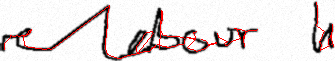

In [344]:
overlay_images(original_img, corrected)

In [283]:
## GET NEAREST FROM GT
gt  = all_items[100].copy()
corrected  = all_items[100].copy()
original_img = all_items[f"{100}_img"].copy()

points, distances = stroke_recovery.get_nearest_point(gt[:,:2], gt[:,:2], reference_is_image=False)
corrected[:,:2] = points
draw_from_gt(corrected)
plot_from_line_img(original_img)
#np.testing.assert_allclose(k, all_items[100])



(336, 4)


In [219]:
x = np.array([1,2,43])
y = x
x = 2*x
y, x

(array([ 1,  2, 43]), array([ 2,  4, 86]))

In [251]:
x = np.squeeze(all_items[f"{100}_img"].copy(),2)

In [294]:
reference = original_img.copy()
if len(reference.shape)==3:
    reference = np.squeeze(reference, 2)
y_coords,x_coords = np.where(reference<150/127.5-1)
reference = np.c_[x_coords, 1-y_coords] / 61


[[ 5.09836066 -0.06557377]
 [ 5.1147541  -0.06557377]
 [ 5.13114754 -0.06557377]
 ...
 [ 2.24590164 -0.96721311]
 [ 2.26229508 -0.96721311]
 [ 2.27868852 -0.96721311]]


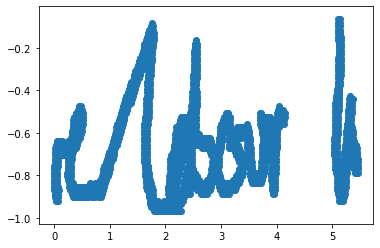

In [293]:
print(reference)
plt.scatter(reference[:,0], reference[:,1,])

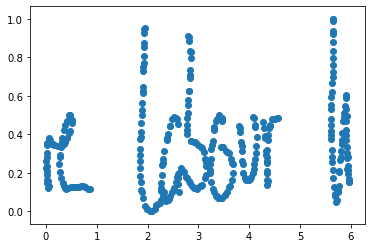

In [282]:
plt.scatter(gt[:,0], gt[:,1,])